<a href="https://colab.research.google.com/github/Riya-gh/GNSS-/blob/main/GNSS_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving LOS DATA.xlsx to LOS DATA.xlsx
Saving NLOS DATA.xlsx to NLOS DATA.xlsx


In [7]:

import pandas as pd

los_sheets = pd.read_excel("LOS DATA.xlsx", sheet_name=None)
nlos_sheets = pd.read_excel("NLOS DATA.xlsx", sheet_name=None)

los_df = pd.concat(los_sheets.values(), ignore_index=True)
nlos_df = pd.concat(nlos_sheets.values(), ignore_index=True)

combined_df = pd.concat([los_df, nlos_df], ignore_index=True)

clean_df = combined_df[['Elevation', 'Azimuth', 'SNR', 'Label']]

clean_df = clean_df.dropna()

clean_df.to_csv("combined_data.csv", index=False)

from google.colab import files
files.download("combined_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Classification Report:

              precision    recall  f1-score   support

        NLOS       1.00      1.00      1.00     12790
         LOS       1.00      1.00      1.00     11040

    accuracy                           1.00     23830
   macro avg       1.00      1.00      1.00     23830
weighted avg       1.00      1.00      1.00     23830



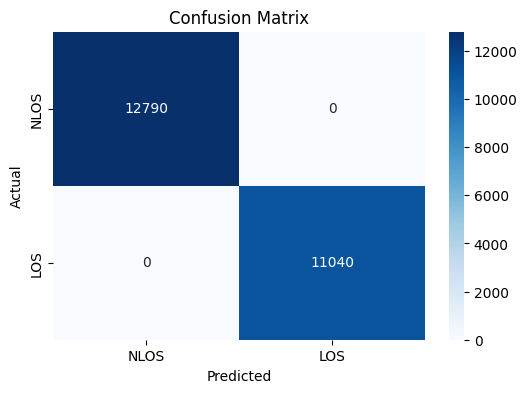

In [8]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the combined CSV file
df = pd.read_csv("combined_data.csv")

# Step 3: Convert label to numeric
df['Label'] = df['Label'].map({'LOS': 1, 'NLOS': 0})

# Step 4: Separate features and labels
X = df[['Elevation', 'Azimuth', 'SNR']]
y = df['Label']

# Step 5: Split data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['NLOS', 'LOS']))

# Step 9: Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10: Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['NLOS', 'LOS'], yticklabels=['NLOS', 'LOS'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
